# <span style="color:Yellow">**IMPORT NESSCARY LIBRARY**</span>

>Các thư viện được sử dụng trong tài liệu sẽ được import trong phần này. 
Các thư viện trong đây bao gồm:
+ Các thư viện hệ thống được dùng trong việc hỗ trợ đọc dữ liệu
+ Các thư viện Toán học,trực quan hóa
+ Các thư viện hỗ trợ
+ Các bộ dữ liệu có sẵn
+ Các mô hình có sẵn

In [2]:
# System library
import os
import time
import sys

# Helper model
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt 

# scikit-learn helper model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

# scikit-learn data
import sklearn.datasets

# scikit-learn model
## Linear models
from sklearn.linear_model import LinearRegression, LogisticRegression

## Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## Cluster models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier

## Tree models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## Other models
from sklearn.decomposition import PCA

# <span style="color:Yellow">**TỔNG QUAN NỘI DUNG KHÓA HỌC**</span>

1. Giới thiệu về Machine Learning, các khái niệm và các hệ số đánh giá cho các mô hình phân loại. Các mô hình Naive Bayes
2. Mô hình Logistic Regression (Hồi quy Logistic) và Softmax
3. Mô hình Linear Regression (Hồi quy tuyến tính)
4. Các mô hình Decision Tree (Cây quyết định) - Phân loại và hồi quy
5. Các mô hình Random Forest (Rừng ngẫu nhiên) - Phân loại và hồi quy
6. Giảm chiều dữ liệu với PCA
7. Mô hình Phân cụm K-Means (K- Trung bình)
8. Mô hình Phân cụm K nearest neighbors (K - gần nhất) - KNN
9. Mô hình phân cụm Gaussian Mixture (Trộn Gaussian) - GMM

X
A B C

P(A) = 1
P(B) = P(C) = 0
-> Hệ không hỗn loạn -> hệ ổn định

P(A) = 0.5
P(B) = 0.3
P(C) = 0.2

-> Hệ hỗn loạn

## **MỘT SỐ KHÁI NIỆM TRONG HỌC MÁY**

### **Học máy là gì?**

Học máy là một lĩnh vực của trí tuệ nhân tạo (AI) tập trung vào việc phát triển các thuật toán và kỹ thuật để cho phép máy tính học hỏi từ dữ liệu và từ kinh nghiệm mà không cần phải được lập trình cụ thể. Điều này cho phép máy tính tự động cải thiện hiệu suất của mình từ thời gian thực hành và mà không cần phải được lập trình cụ thể.

-> "Dạy" máy tính học thông qua các thuật toán. Các bước xây dựng một chương trình học máy bao gồm: Xử lý dữ liệu, huấn luyện, kiểm tra đánh giá và cuối cùng là ứng dụng. Các thuật toán phần lớn đều xuất phát từ việc học dạy học một người. Việc huấn luyện = việc học trên lớp. Việc kiểm tra mô hình tương đương với việc kiểm tra.

### **Một số khái niệm phổ biến trong học máy và kí hiệu.**

Trong Học máy có khá nhiều khái niệm, cũng như kí hiệu phổ biến. 

#### 1. Entropy
- **Định nghĩa**: Trong học máy, entropy là một thước đo độ hỗn loạn hay mức độ không chắc chắn trong một tập dữ liệu. Nó được sử dụng để xác định sự phân bố xác suất của các biến ngẫu nhiên và là một yếu tố quan trọng trong thuật toán cây quyết định.
- **Ví dụ**: Trong cây quyết định, entropy được sử dụng để chọn thuộc tính tốt nhất để phân chia dữ liệu tại mỗi nút.

- **Công thức**: 

$H(X) = -\sum_{i=1}^{n} p(x_i) \log_2 p(x_i)$

Trong đó:
- $H(X)$ là entropy của biến ngẫu nhiên $X$.
- $p(x_i)$ là xác suất xảy ra của giá trị $x_i$.
- $\log_2$ là logarithm cơ số 2.
- $x_i$ là dữ liệu đầu ra (Nhãn) của dữ liệu

#### 2. Dữ liệu đầu vào (Input Data)
- **Định nghĩa**: Là các dữ liệu được sử dụng để huấn luyện mô hình học máy. Dữ liệu đầu vào bao gồm các đặc trưng hoặc biến mà từ đó mô hình học để dự đoán giá trị đầu ra.
- **Ví dụ**: Các biến như diện tích nhà, số phòng ngủ để dự đoán giá nhà.

#### 3. Nhãn (Labels)
- **Định nghĩa**: Là giá trị đích hoặc kết quả mà mô hình học máy cần dự đoán. Trong học có giám sát, dữ liệu huấn luyện bao gồm cả dữ liệu đầu vào và nhãn.
- **Ví dụ**: Giá nhà trong bài toán dự đoán giá nhà, loại thư (spam hoặc không spam) trong bài toán phân loại thư.

#### 4. Ngoại lai/ nhiễu (Outliers/Noise)
- **Định nghĩa**: Là các điểm dữ liệu khác biệt lớn so với các điểm dữ liệu khác trong tập dữ liệu, có thể làm sai lệch kết quả mô hình học máy.
- **Ví dụ**: Một ngôi nhà có giá bán cực kỳ cao hoặc thấp so với các ngôi nhà khác trong cùng khu vực.

![image.png](image/Outlier.png)

#### 5. Overfit
- **Định nghĩa**: Là hiện tượng mô hình học quá kỹ các chi tiết và nhiễu của dữ liệu huấn luyện, dẫn đến hiệu suất kém trên dữ liệu kiểm tra.
- **Ví dụ**: Một mô hình có độ chính xác cao trên dữ liệu huấn luyện nhưng kém trên dữ liệu kiểm tra.

#### 6. Underfit
- **Định nghĩa**: Là hiện tượng mô hình không học đủ các đặc trưng từ dữ liệu huấn luyện, dẫn đến hiệu suất kém trên cả dữ liệu huấn luyện và kiểm tra.
- **Ví dụ**: Một mô hình đơn giản không thể nắm bắt được xu hướng của dữ liệu.

#### 7. Good fit
- **Định nghĩa**: Là khi mô hình có thể học được các đặc trưng quan trọng từ dữ liệu huấn luyện và hoạt động tốt trên dữ liệu kiểm tra.
- **Ví dụ**: Một mô hình có độ chính xác cao và ổn định trên cả dữ liệu huấn luyện và kiểm tra.

![image.png](image/Fit.png)

#### 8. Phân loại (Classification)
- **Định nghĩa**: Là bài toán học máy giám sát nhằm phân loại các điểm dữ liệu vào các nhóm hoặc lớp.
- **Ví dụ**: Nhận diện thư rác, phân loại ảnh.

#### 9. Phân lớp (Clustering)
- **Định nghĩa**: Là bài toán học máy không giám sát nhằm phân chia các điểm dữ liệu thành các cụm dựa trên tính tương tự.
- **Ví dụ**: Phân cụm khách hàng theo hành vi mua sắm.

#### 10. Hồi quy (Regression)
- **Định nghĩa**: Là bài toán học máy giám sát dùng để dự đoán giá trị đầu ra liên tục dựa trên một hoặc nhiều biến đầu vào.
- **Ví dụ**: Dự đoán giá nhà, dự báo doanh thu.

#### 11. Cross-Validation
- **Định nghĩa**: Là kỹ thuật đánh giá hiệu suất của mô hình bằng cách chia dữ liệu thành nhiều phần và kiểm tra mô hình trên các phần này để đảm bảo tính tổng quát.
- **Ví dụ**: K-fold cross-validation.

#### 12. Trường thông tin (Field)
- **Định nghĩa**: Là một cột trong bảng dữ liệu, đại diện cho một đặc trưng hoặc thuộc tính của dữ liệu.
- **Ví dụ**: Cột "diện tích" hoặc "số phòng ngủ" trong bảng dữ liệu về nhà.

#### 13. Bản ghi (Record)
- **Định nghĩa**: Là một hàng trong bảng dữ liệu, đại diện cho một đối tượng hoặc một mẫu dữ liệu cụ thể.
- **Ví dụ**: Một hàng chứa thông tin về một ngôi nhà cụ thể, bao gồm diện tích, số phòng ngủ, và giá bán.

### **Một vài công thức toán học**

* Nghịch đảo ma trận

* Nhân ma trận

* Chuyển vị ma trận

* Giá trị riêng và vecto riêng của ma trận

* Xác suất có điều kiện

* Định lý Bayes

* Ma trận đối xứng

* Ma trận xác định dương, nửa xác định dương

### **Phân loại các thuật toán học máy.**

Các thuật toán học máy có thể được phân loại chủ yếu thành ba nhóm chính dựa trên cách chúng học từ dữ liệu:

1. **Học giám sát (Supervised Learning)**:
   - Thuật toán này yêu cầu dữ liệu huấn luyện có nhãn để học. Mục tiêu là xây dựng một mô hình có thể dự đoán đầu ra cho các dữ liệu mới dựa trên dữ liệu huấn luyện đã biết trước. Ví dụ: Hồi quy tuyến tính, Máy vector hỗ trợ (SVM), Mạng nơ-ron nhân tạo.

2. **Học không giám sát (Unsupervised Learning)**:
   - Thuật toán này không yêu cầu dữ liệu huấn luyện có nhãn. Mục tiêu là khám phá cấu trúc hoặc mô hình ẩn trong dữ liệu. Ví dụ: Phân cụm (Clustering), Phân tích thành phần chính (PCA), Mạng nơ-ron tự tổ chức (Self-organizing Maps).

3. **Học bán giám sát và học tăng cường (Semi-supervised Learning and Reinforcement Learning)**:
   - **Học bán giám sát**: Kết hợp cả dữ liệu có nhãn và không có nhãn để học.
   - **Học tăng cường**: Máy học từ kinh nghiệm thông qua thử và sai, thường được áp dụng trong các bài toán đưa ra quyết định liên tục. Ví dụ: Q-learning, Policy Gradient.

Mỗi nhóm thuật toán này có những ứng dụng và đặc điểm riêng, được áp dụng rộng rãi trong các lĩnh vực từ khoa học dữ liệu đến tự động hóa và robot.

## <span style="color:Yellow">**MA TRẬN NHẦM LẪN**</span>

$
\begin{array}{c|c}
 & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & \color{green}{TN} & \color{red}{FP} \\
\text{Actual Positive} & \color{red}{FN} & \color{green}{TP} \\
\end{array}
$

- <span style="color:green">**TN (True Negative)**</span>: Số lượng các trường hợp mà mô hình dự đoán là negative và thực sự là negative.
- <span style="color:red">**FP (False Positive)**</span>: Số lượng các trường hợp mà mô hình dự đoán là positive nhưng thực sự là negative.
- <span style="color:red">**FN (False Negative)**</span>: Số lượng các trường hợp mà mô hình dự đoán là negative nhưng thực sự là positive.
- <span style="color:green">**TP (True Positive)**</span>: Số lượng các trường hợp mà mô hình dự đoán là positive và thực sự là positive.

## <span style="color:Yellow">**MỘT VÀI HỆ SỐ ĐÁNH GIÁ TRONG HỌC MÁY**</span>.

1. <span style ="color:Orange">**Accuracy (Độ chính xác):**</span>
   $\frac{k}{n}$

2. <span style ="color:Orange">**Precision (Độ chính xác dự đoán):**</span>
   $\frac{\text{\color{green}{TN}}}{\text{\color{green}{TN}} + \text{\color{red}{FP}}}$

3. <span style ="color:Orange">**Recall (Độ nhạy):**</span>
   $\frac{\text{\color{green}{TN}}}{\text{\color{green}{TN}} + \text{\color{red}{FN}}}$

4. <span style ="color:Orange">**F1 Score (Giá trị trung bình điều hòa):**</span>
   $2 \cdot \frac{\text{\color{Orange}{Precision}} \cdot \text{\color{Orange}{Recall}}}{\text{\color{Orange}{Precision}} + \text{\color{Orange}{Recall}}}$

5. <span style ="color:Orange">**Mean Squared Error (MSE):**</span>
   $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

6. <span style ="color:Orange">**R-squared (Coefficient of Determination):**</span>
   $1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$


## **VECTO ĐẶC TRƯNG**

Vecto đặc trưng là một biểu diễn số học của một đối tượng trong không gian đặc trưng. Đối tượng này có thể là bất cứ thứ gì có thể được mô tả bằng các thuộc tính số học, ví dụ như một văn bản, một hình ảnh, hay một âm thanh. Trong machine learning và data mining, vecto đặc trưng thường được sử dụng để biểu diễn dữ liệu để máy tính có thể hiểu và xử lý. Các thuộc tính của đối tượng được biểu diễn bằng các chiều của vecto, mỗi chiều có thể là một thuộc tính riêng biệt hoặc một đặc trưng được trích xuất từ đối tượng đó.

### **One-hot encoding và Word Embedding**

**One-hot encoding**:
- One-hot encoding là một phương pháp đơn giản để biểu diễn các từ trong từ điển.
- Mỗi từ được biểu diễn bằng một vecto có chiều dài bằng số lượng từ trong từ điển.
- Ví dụ: cho 3 chuỗi
  - d1: `hanoi pho chaolong hanoi` - B
  - d2: `hanoi buncha pho omai` - B
  - d3: `saigon hutieu banhbo pho` - N

Từ điển trong trường hợp này sẽ là: `[hanoi, pho, chaolong, buncha, omai, saigon, hutieu, banhbo]`

Vecto đặc trưng sẽ là:
- d1: `[1, 1, 1, 0, 0, 0, 0, 0]`
- d2: `[1, 1, 0, 0, 1, 0, 0, 0]`
- d3: `[0, 1, 0, 0, 0, 1, 1, 1]`

> One-hot encoding đơn giản và dễ hiểu nhưng có thể rất thưa (sparse) với các từ điển lớn.


**Word embedding**:
- Word embedding là một kỹ thuật phức tạp hơn, mô tả từng từ bằng một vecto số thực có số chiều thấp hơn rất nhiều so với kích thước của từ điển.
- Các vecto này chứa thông tin ngữ nghĩa và ngữ cảnh của từ, được học từ dữ liệu lớn.
- Ví dụ: cho 3 chuỗi
  - d1: `hanoi pho chaolong hanoi` - B
  - d2: `hanoi buncha pho omai` - B
  - d3: `saigon hutieu banhbo pho hutieu saigon` - N

Từ điển trong trường hợp này sẽ là: `[hanoi, pho, chaolong, buncha, omai, saigon, hutieu, banhbo]`

Vecto đặc trưng sẽ là:
- d1: `[2, 1, 1, 0, 0, 0, 0, 0]`
- d2: `[1, 1, 0, 0, 1, 0, 0, 0]`
- d3: `[0, 1, 0, 0, 0, 2, 2, 1]`

> Word embedding thường mang lại kết quả tốt hơn trong các tác vụ NLP như phân loại văn bản, dịch máy, v.v.

# **CÁC MÔ HÌNH NAIVEBAYES**

Naive Bayes là một nhóm các mô hình phân loại xác suất, được xây dựng dựa trên định lý Bayes với giả định đơn giản rằng các đặc tính (features) của các đối tượng (instances) là độc lập với nhau. Mặc dù giả định này thường không chính xác trong thực tế, các mô hình Naive Bayes vẫn hoạt động hiệu quả trong nhiều bài toán phân loại khác nhau.

> **Maximum likelihood** là phương pháp tối đa hóa xác suất để dữ liệu quan sát được là một mẫu từ một phân phối xác suất cụ thể, khi biết rằng mô hình có các tham số cần được ước lượng. Ý tưởng chính của học máy là tìm các giá trị của các tham số mô hình sao cho xác suất để dữ liệu quan sát được là lớn nhất.

>Điểm khác nhau giữa các mô hình Naive Bayes là **dữ liệu đầu vào**. Bernoulli là dữ liệu dạng nhị phân (0-1 hoặc tương tự) và Multinormial là dữ liệu rời rạc còn với Gaussian lại yêu cầu các dữ liệu liên tục (tuân theo phân bố chuẩn).


## 1. Gaussian Naive Bayes
Được sử dụng khi các đặc tính liên tục và tuân theo phân phối chuẩn (Gaussian distribution). Công thức xác suất có dạng:

$P(x_i | y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} e^{\left(-\frac{(x_i - \mu_y)^2}{2 \sigma_y^2}\right)}$

Trong đó:
- $x_i$ là giá trị của đặc tính thứ $i$.
- $\mu_y$ và $\sigma_y$ lần lượt là trung bình và độ lệch chuẩn của đặc tính trong lớp $y$.

### **Huấn luyện**

Để huấn luyện một mô hình Gaussian Naive Bayes, chúng ta thực hiện các bước sau:

* Xử lý dữ liệu và đưa về các vector đặc trưng. Dữ liệu được chuẩn bị và biểu diễn dưới dạng các vector đặc trưng.

* Tính xác suất để một dữ liệu thuộc lớp $y_i$. Tính các tham số Gaussian cho từng đặc trưng của mỗi lớp $y_i$, bao gồm giá trị trung bình và độ lệch chuẩn.

* Lưu lại các tham số thành các vector hệ số $\theta$. Mỗi lớp trong mô hình sẽ có một vector hệ số $\theta$ tương ứng, chứa các giá trị trung bình và độ lệch chuẩn cho từng đặc trưng.

### **Dự đoán**

Sau khi đã có các vector hệ số, ta có thể dự đoán nhãn của dữ liệu mới bằng các bước sau:

* Xử lý dữ liệu và đưa về các vector đặc trưng. Dữ liệu mới cần được chuẩn bị để có cùng định dạng với dữ liệu đã huấn luyện.

* Với mỗi lớp $y_j$, tính xác suất dựa trên hàm mật độ xác suất của phân phối Gaussian cho từng đặc trưng $x_i$.

* So sánh và dự đoán nhãn. Xác định lớp có xác suất cao nhất bằng cách tính arg$\max_{y_j}{P(y_j | x)}$.

In [2]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        """
        Fit Gaussian Naive Bayes model to training data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Training data.
        y : array-like of shape (n_samples,)
            Target values.

        Returns:
        None
        """
        # Initialize parameters
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)
        
        # Calculate mean, variance, and class priors for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / X.shape[0]
    
    def _pdf(self, class_idx, x):
        """
        Compute the probability density function of Gaussian distribution.

        Parameters:
        class_idx : int
            Index of the class.
        x : array-like of shape (n_features,)
            Input data point.

        Returns:
        pdf : array-like of shape (n_features,)
            Probability density function values.
        """
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def _predict(self, x):
        """
        Predict the class label for a single sample.

        Parameters:
        x : array-like of shape (n_features,)
            Input data point.

        Returns:
        predicted_class : int
            Predicted class label.
        """
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        """
        Predict the class labels for multiple samples.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Input data.

        Returns:
        predicted_classes : array-like of shape (n_samples,)
            Predicted class labels.
        """
        return np.array([self._predict(x) for x in X])

## 2. Multinomial Naive Bayes
Phù hợp với các đặc tính rời rạc, chẳng hạn như số lần xuất hiện của từ trong một văn bản. Được sử dụng phổ biến trong phân loại văn bản và phân tích dữ liệu văn bản. Xác suất của một đặc tính $x_i$ cho lớp $y$ được tính bằng:

$P(x_i | y) = \frac{\text{count}(x_i \text{ trong lớp } y) + 1}{\sum_{x_j} (\text{count}(x_j \text{ trong lớp } y) + 1)}$

### **Huấn luyện**

Ta thực hiện các bước sau để huấn luyện một mô hình Multinomial Naive Bayes

* Xử lý dữ liệu và đưa về các vecto đặc trưng

* Tính xác suất để một dữ liệu thuộc lớp $y_i$. Hay nói cách khác là tìm số lượng các bản ghi $x_i$ được gán nhãn là $y_i$. Ta lưu lại các hệ số này là $\omega$

* Tính xác suất cho từng đặc trưng theo các lớp. Gom dữ liệu thành các lớp cùng nhãn, sau đó tính tổng số lần xuất hiện đặc trưng / tổng số đặc trưng. Hay nói cách khác, ta sẽ đi tính $P(x_i|y)$ - Xác suất để bản ghi có đặc trưng $x_i$.

* Lưu lại các hệ số thành các vecto hệ số $\theta$ hoàn chỉnh tương ứng với mỗi 1 vecto là hệ số của một lớp. Và kết thúc bước huấn luyện

### **Dự đoán**

Sau khi đã có vecto hệ số. Ta sẽ tiến hành kiểm tra xem một dữ liệu mới sẽ trả về kết quả như nào.

* Xử lý dữ liệu và đưa về các vecto đặc trưng. Lưu ý cần xử lý dữ liệu giống với dữ liệu được training và đặc biệt chú ý về số đặc trưng có trong từng bản ghi phải đầy đủ.

* Ta lấy số lượng đặc trưng $x_i$ của bản ghi tạm gọi là $k_i$.

* Ta sẽ tính tích từng vecto với từng vecto hệ số $\prod_{i = 0}^{n}{\theta_{i,j}^{k_i}} = \prod_{i = 0}^{n}{p(x|y_j)}$

* Sau đấy sẽ thu được $m$ xác suất $p_i$ ($0\leq p_i \leq 1$) ta tiến hành nhân các xác suất $p_i$ với xác suất của từng lớp $\omega_i$. $P(y_i|x)=p_i * p(y_j)$ Khi này ta so sánh xem, lớp nào có xác suất cao hơn, thì ta kết luận là dữ liệu $x$ có nhãn tương ứng. $\argmax_{y}{P(y_i|x)}$

In [3]:
class MultinomialNaiveBayes:
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Train the Naive Bayes model using the training data.
        
        Parameters:
        X : numpy array, shape (n_samples, n_features)
            Feature matrix of the training data.
        y : numpy array, shape (n_samples,)
            Array containing labels of the training data.

        Returns:
        None
        """
        # Initialize variables to store class information and feature counts
        self.classes = np.unique(y)  # Unique classes in the target variable y
        self.class_count = np.zeros(len(self.classes), dtype=np.float64)  # Count of each class
        
        self.feature_count = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)  # Count of each feature for each class
        self.feature_prob = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)  # Probability of each feature for each class
        
        # Calculate class counts and feature counts        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]  # Subset of X where y == c (instances of class c)
            self.class_count[idx] = X_c.shape[0]  # Number of instances of class c
            self.feature_count[idx, :] = X_c.sum(axis=0)  # Sum of all features for instances of class c
        
        # Calculate feature probabilities using Laplace smoothing
        self.feature_prob = (self.feature_count + 1) / (self.class_count[:, None] + X.shape[1])
        
        # Calculate class probabilities    
        self.class_prob = self.class_count / X.shape[0]  # Prior probability of each class
        return self
    
    def _predict(self, x):
        """
        Predict the class of a feature sample x.

        Parameters:
        x : numpy array, shape (n_features,)
            Feature sample to predict the class.

        Returns:
        predicted_class : object
            Predicted class for feature sample x.
        """
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.class_prob[idx])  # Logarithm of the prior probability of class c
            likelihood = np.sum(x * np.log(self.feature_prob[idx]))  # Log-likelihood of instance x belonging to class c
            posterior = prior + likelihood  # Posterior probability of class c given instance x
            posteriors.append(posterior)
        predicted_class = self.classes[np.argmax(posteriors)]  # Predicted class is the one with the highest posterior probability
        return predicted_class
    
    def predict(self, X: np.ndarray):
        """
        Predict the class of feature samples in matrix X.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            Feature matrix of samples to predict the class.

        Returns:
        predicted_classes : numpy array, shape (n_samples,)
            Array containing predicted classes for each feature sample in X.
        """
        predicted_classes = np.array([self._predict(x) for x in X])  # Predict class for each feature sample in X
        return predicted_classes



## 3. Bernoulli Naive Bayes
Thích hợp với các đặc tính nhị phân (có hoặc không có). Cũng thường được sử dụng trong phân loại văn bản, nhưng với dữ liệu biểu diễn dưới dạng "có" hoặc "không" (ví dụ: từ xuất hiện hoặc không xuất hiện trong tài liệu). Công thức xác suất:

$P(x_i | y) = P(x_i = 1 | y)^{x_i} \cdot P(x_i = 0 | y)^{1 - x_i}$

Về cách tính toán xác suất và phân loại tương tự như 2 phần trên nên sẽ không nhắc lại.

In [4]:
class BernoulliNaiveBayes:
    def fit(self, X, y):
        """
        Fit Bernoulli Naive Bayes model to training data.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Training data.
        y : array-like of shape (n_samples,)
            Target values.

        Returns:
        None
        """
        # Initialize parameters
        self.classes = np.unique(y)
        self.class_count = np.zeros(len(self.classes), dtype=np.float64)
        self.feature_prob = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        
        # Calculate class counts and feature probabilities for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_count[idx] = X_c.shape[0]
            self.feature_prob[idx, :] = (X_c.sum(axis=0) + 1) / (X_c.shape[0] + 2)
        
        # Calculate class probabilities
        self.class_prob = self.class_count / X.shape[0]
    
    def _predict(self, x):
        """
        Predict the class label for a single sample.

        Parameters:
        x : array-like of shape (n_features,)
            Input data point.

        Returns:
        predicted_class : int
            Predicted class label.
        """
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.class_prob[idx])
            likelihood = np.sum(x * np.log(self.feature_prob[idx]) + (1 - x) * np.log(1 - self.feature_prob[idx]))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]
    
    def predict(self, X):
        """
        Predict the class labels for multiple samples.

        Parameters:
        X : array-like of shape (n_samples, n_features)
            Input data.

        Returns:
        predicted_classes : array-like of shape (n_samples,)
            Predicted class labels.
        """
        return np.array([self._predict(x) for x in X])

# **LINEAR MODELS**

## Linear Regression Model - Hồi quy tuyến tính.

Chúng ta sẽ làm quen với mô hình thông qua bài toán **Dự đoán giá nhà**. Bài toán được phát biểu như sau: Cho một căn nhà có diện tích $x_1 m^2$, $x_2$ phòng ngủ và cách trung tâm thành phố $x_3$ km. Hãy Định giá căn nhà dựa vào các trường thông tin đã có. Biết rằng chúng ta có số liệu từ $n$ căn nhà.



Ta gọi hàm dự đoán $y=f(x)$. Mục đích của chúng ta là sẽ đi tìm một hàm $f(x)=\hat{y}$ sao cho $\hat{y}\approx y$. Ta có dữ liệu đầu vào là một ma trận $x = [x_1, x_2, x_3]$ và một vecto cột $y$ tương ứng là nhãn của dữ liệu.

Ta sẽ tiếp cận bài toán một cách đơn giản trước. Giả sử chúng ta có dữ liệu từ 3 căn nhà và được biểu diên dưới dạng ma trận như sau:

$$
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} \\
a_{2,1} & a_{2,2} & a_{2,3} \\
a_{3,1} & a_{3,2} & a_{3,3}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$

Ta sẽ thấy khá rõ ràng là đây là một bài toán phổ thông -> một đứa trẻ cũng giải được. Ta sẽ dễ dàng tìm được vecto $x$ với các giá trị ở ma trận $A$ cho sẵn. Lưu ý ở đây. Các hệ số là dữ liệu đầu vào tương ứng với các trường dữ liệu. và vecto $x$ biểu thị cho tham số và "Tầm ảnh hưởng của từng trường dữ liệu" ($x_1$ ở trong vecto chính là hệ số của trường thông tin *diện tích căn nhà* đã đề cập ở đề bài). Bằng các phương pháp giải hệ phương trình đã học, ta dễ dàng tính được vecto $x$. Đồng thời bằng phương pháp hình học ta dễ dàng vẽ được một đường thẳng đi qua 3 điểm có tọa độ tương ứng là ma trận dữ liệu đầu vào.

Nhưng nếu chỉ dừng ở đây thì quá đơn giản. Ta luôn có thể trích ra được bộ dữ liệu gồm chính xác $m$ dữ liệu tương ứng với $m$ trường dữ liệu, sau đó tiến hành giải hệ phương trình. Nhưng để ý thấy, tất cả các điểm đều không nằm trên cùng 1 đường thẳng. Điều này xảy ra do một vài yếu tố khác nhau dẫn tới ta cần lựa chọn các đường thẳng sao cho *"Thật khéo"*. Hay nói cách khác là phải chọn đường thẳng sao cho tổng bình phương khoảng cách từ các điểm dữ liệu đến đường thẳng này là bé nhất. Lưu ý, bài toán Hồi quy tuyến tính có nhiều hơn 1 cách tiếp cận, tuy nhiên ở đây sẽ đề cập đến hồi quy tuyến tính bằng cách tính toán trực tiếp với bộ dữ liệu. 

Chúng ta có thể dễ dàng nhận thấy phương trình $f(x) = y$ sẽ có thể biểu diễn là $f(x) = w_1x_1 + w_2x_2 + w_3x_3 + w_0 = y$

Trong đó:
* $w_i$ là các hệ số cần tìm
* $x_i$ là vecto cột chứa dữ liệu đầu vào
* $w_0$ là hệ số tự do
* $y$ là kết quả thực tế.

Ta có vecto $\mathbf{w} = [w_0, w_1, w_2, w_3]^T$ là vecto hệ số cần tối ưu và $\overline{x} = [1, x]$ (vecto $x$ ngang hoặc x bar) là vecto mở rộng thêm một cột 1 đầu tiên để thuận tiện cho việc tính toán (Tìm hệ số tự do $w_0$) khi này ta có phương trình 

$$
y \approx \mathbf{w}\overline{x} = \hat{y} 
$$

Sai số được tính bằng công thức **MSE** đã được đề cập ở mục các hệ số đánh giá phía trên.
$$
MSE = \frac{1}{n} \sum_{i = 1}^{n}{y - \mathbf{w}\overline{x}}
$$

Hàm mất mát (loss function) của bài toán được tính bằng công thức.

$$
\mathcal{L}(\mathbf{\mathbf{w}}) = \frac{1}{2} \sum_{i=1}^{N} \left( y_i - \bar{x}_i \mathbf{w} \right)^2 \quad
$$

Hay đơn giản hóa theo dạng ma trận như sau:

$$
\mathcal{L(\mathbf{w})} = \frac{1}{2}\|y-\overline{X}\mathbf{w}\|_2^2
$$


Chúng ta luôn mong muốn rằng sự mất mát (sai số) là nhỏ nhất, điều đó đồng nghĩa với việc tìm vector hệ số $w$ sao cho giá trị của hàm mất mát này càng nhỏ càng tốt. Giá trị của $w$ làm cho hàm mất mát đạt giá trị nhỏ nhất được gọi là điểm tối ưu (optimal point), ký hiệu:

$$
w* = \argmin{\mathcal{L}(\mathbf{w})}
$$


Vậy giải nghiệm của bài toán hồi quy tuyến tính như nào? Ta sẽ tiến hành các bước như sau:

Đầu tiên ta tiến hành đạo hàm hàm mất mát theo $w$:

$$
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}} = \bar{\mathbf{X}}^T \left( \bar{\mathbf{X}} \mathbf{w} - \mathbf{y} \right)
$$

Giải phương trình đạo hàm bằng 0 ta có

$$
\overline{\mathbf{X}}^T\overline{\mathbf{X}}\mathbf{w} = \overline{\mathbf{X}}^Ty
$$

Ta đặt 
* $\overline{\mathbf{X}}^T\overline{\mathbf{X}} = A$
* $\overline{\mathbf{X}}^Ty = b$

Khi này phương trình trên viết được dưới dạng
$$
A\mathbf{w} = b
$$

Như vậy công thức nghiệm của bài toán sẽ là

$$
w = Ab = (\bar{\mathbf{X}}^T\bar{\mathbf{X}})\bar{\mathbf{X}}^Ty
$$

Sau khi đã có các hệ số $w$ với dữ liệu mới ta chỉ cần tiến hành nhân ma trận như bình thường. Lưu ý trước khi nhân, ta cần thêm một cột 1 ở phía trước để phù hợp với hệ số tự do.

Ta sẽ xét một ví dụ đơn giản về việc tại sao không thể dùng cách chọn $m$ điểm rồi giải hệ phương trình như ở phổ thông mà đã đề cập ở phía trên. 



Ta xét bài toán dự đoán cân nặng dựa vào chiều cao. Cho dữ liệu gồm thông tin của 15 người, tìm đường hồi quy dự đoán cân nặng theo chiều cao. Và dự đoán cân nặng cho một người có chiều cao 155
Ta tiến hành trực quan hóa như sau

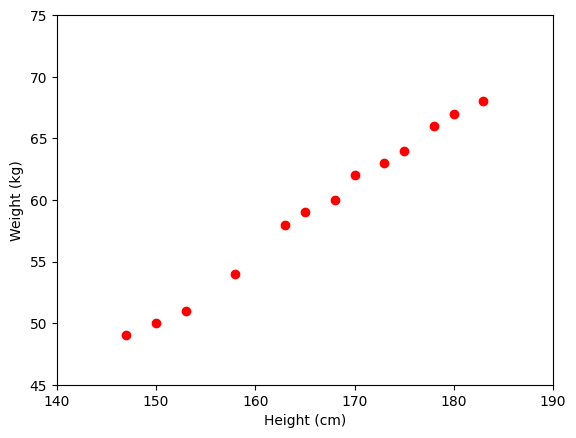

In [5]:
# height (cm)
x = np.array([[147,150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
plt.plot(x, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Ta tiến hành chọn 2 điểm đầu tiên, sau đó giải hệ phương trình:
$$
\begin{bmatrix}
147a & b\\
150a & b
\end{bmatrix}
=
\begin{bmatrix}
49 \\
50
\end{bmatrix}
$$

In [6]:
A = np.array([[147, 1],
              [150, 1]])
b = np.array([49, 50])
solution = np.linalg.solve(A, b)
a, b = solution
print(f'a = {a}')
print(f'b = {b}')

a = 0.33333333333333487
b = -2.33146835171284e-13


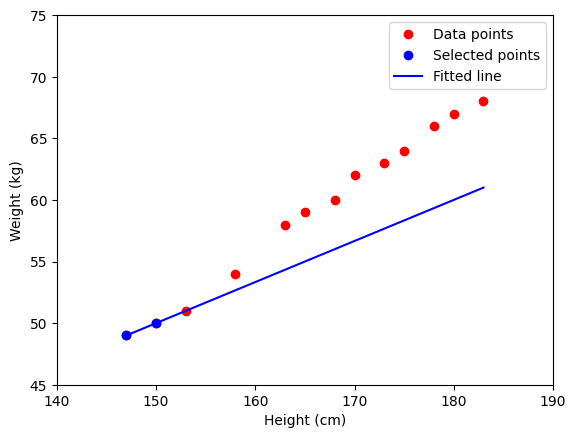

In [7]:
# Lựa chọn 3 điểm
X_selected = x[:2, 0].reshape(-1, 1)
y_selected = y[:2].reshape(-1, 1)

# Vẽ dữ liệu và đường thẳng
plt.plot(x, y, 'ro', label='Data points')
plt.plot(X_selected, y_selected, 'bo', label='Selected points')
plt.plot(x, a*x + b, 'b-', label='Fitted line')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

Qua trực quan hóa đồ thị, ta có thể thấy rõ ràng sự sai lệch sẽ tăng lên đáng kế về sau. Sẽ có thắc mắc là tại sao không chọn điểm đầu và điểm ở cuối. Điều này cũng không chắc chắn được kết quả và sai số vẫn có thể khá lớn.

In [8]:
class LinearRegreesion:
    def fit(self, x, y):
        ones = np.ones((1, x.shape[0])).T
        x_bar = np.concatenate([ones, x], axis=1)
        A = np.dot(x_bar.T, x_bar)
        b = np.dot(x_bar.T, y)
        self.theta = np.dot(np.linalg.inv(A), b)
        self.intercept = self.theta[0]
        self.coefficient = self.theta[1:]
        return self
    
    def predict(self, x):
        ones = np.ones((1, x.shape[0])).T
        x_bar = np.concatenate((ones, x), axis=1)
        return np.dot(x_bar, self.theta)

In [9]:
x = np.array([[147,150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
model = LinearRegreesion()
model.fit(x, y)
model.predict(np.array([[155, 160]]).T)

array([[52.94135889],
       [55.7373837 ]])

Một trường hợp cho thấy nhiễu ảnh hưởng tới kết quả như thế nào. Vẫn với ví dụ trước, chúng ta thêm 1 cặp giá trị (150 - 90) như sau.

In [10]:
x = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

Thực hiện dự đoán với dữ liệu mới như sau.

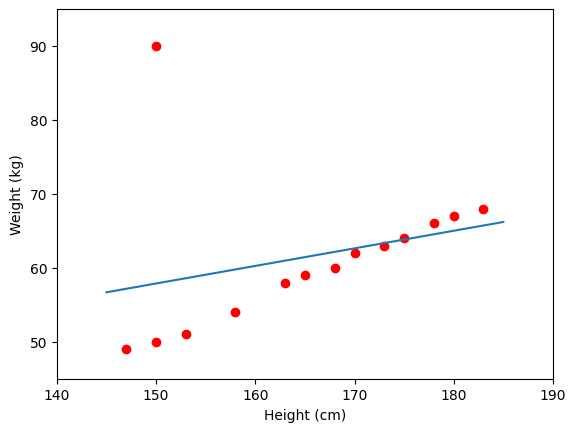

In [11]:
model = LinearRegreesion()
model.fit(x, y)
w = model.theta
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w[0] + w[1]*x0

# Drawing the fitting line 
plt.plot(x, y, 'ro') 
plt.plot(x0, y0)
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## **PERCEPTRON LEARNING ALGORITHMM - PLA**

Ý tưởng của PLA là chúng ta sẽ đi tìm một siêu phẳng sao cho chia dữ liệu thành đúng 2 phần mỗi phần riêng biệt và các phần đều chung 1 nhãn. Cách ta tìm siêu phẳng, tương tự như việc ta tìm một đường tuyến tính ở phần hồi quy tuyến tính. 

PLA tiến hành huấn luyện với dữ liệu đầu vào bằng cách liên tục cập nhật các hệ số $w$ và so sánh với nhãn thực tế. Nếu dự đoán của mô hình trên tập huấn luyện là sai mô hình sẽ tiến hành cập nhật lại hệ số cho tới khi tìm được siêu phẳng cắt hoàn hảo thành 2 phần. Điều này có nghĩa, mô hình rất nhạy cảm với nhiễu.

In [12]:
class Perceptron:
    def __init__(self, learning_rate=1.0, epochs=10):
        """
        Initialize the Perceptron with learning rate and number of epochs.

        :param learning_rate: Learning rate for weight updates
        :param epochs: Number of iterations over the training data
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        """
        Train the Perceptron model with input data X and labels y.

        :param X: Input data (should be of shape (num_samples, num_features))
        :param y: Labels (should be of shape (num_samples,))
        """
        # Add a column of ones to handle the bias term
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Initialize weights to zeros
        self.weights = np.zeros(X.shape[1])

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Predict the class of sample i
                prediction = np.sign(np.dot(X[i], self.weights))
                
                # Update weights if prediction is incorrect
                if prediction != y[i]:
                    self.weights += self.learning_rate * (y[i] - prediction) * X[i]

    def predict(self, X):
        """
        Predict the class for input data X.

        :param X: Input data (should be of shape (num_samples, num_features))
        :return: Predicted classes (should be of shape (num_samples,))
        """
        # Add a column of ones to handle the bias term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        return np.sign(np.dot(X, self.weights))

## **lOGISTIC REGRESSION**

In [13]:
class LogisticRegression:
    def __init__(self, learning_rate=0.05, tol=1e-4, max_iter=10000):
        """
        Initialize the logistic regression model with given hyperparameters.
        
        Parameters:
        learning_rate (float): The learning rate for gradient descent.
        tol (float): The tolerance for the stopping criterion.
        max_iter (int): The maximum number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.coeff = None
    
    def _sigmoid(self, s):
        """
        Compute the sigmoid function.
        
        Parameters:
        x (ndarray): The input value or array.
        
        Returns:
        ndarray: The sigmoid of the input.
        """
        print(s)
        return 1 / (1 + np.exp(-s))
    
    def fit(self, x, y):
        """
        Fit the logistic regression model to the training data.
        
        Parameters:
        x (ndarray): The input features of shape (n_samples, n_features).
        y (ndarray): The target values of shape (n_samples, 1).
        
        Returns:
        self: Fitted model.
        """
        # Add a column of ones to the input features to account for the bias term
        X_bar = np.concatenate((np.ones([x.shape[0], 1]), x), axis=1)
        N = X_bar.shape[0]  # Number of samples
        d = X_bar.shape[1]  # Number of features (including bias)
        
        # Initialize weights randomly
        w = np.random.randn(d, 1)
        
        for count in range(1, self.max_iter + 1):
            # Shuffle the data indices
            mix_id = np.random.permutation(N)
            for i in mix_id:
                xi = X_bar[i].reshape((d, 1))
                
                yi = y[i]
                zi = self._sigmoid(np.dot(w.T, xi))
                # Update weights using gradient descent
                w_new = w + self.learning_rate * (yi - zi) * xi
                
                # Check for convergence every N iterations
                if count % N == 0:
                    if np.linalg.norm(w_new - w) < self.tol:
                        self.coeff = w_new
                        return self
                w = w_new
                
        self.coeff = w
        return self
    
    def predict(self, X):
        """
        Predict the target values for given input data.
        
        Parameters:
        X (ndarray): The input features of shape (n_samples, n_features).
        
        Returns:
        list: Predicted binary values (0 or 1).
        """
        # Add a column of ones to the input features to account for the bias term
        X_bar = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        # Compute the sigmoid of the dot product of the input features and the weights
        return self._sigmoid(np.dot(X_bar, self.coeff))

# **DECISION TREE MODELS**

DecisionTree là một thuật toán học máy dùng để phân loại và dự đoán. Nó hoạt động bằng cách chia nhỏ tập dữ liệu đầu vào thành các tập con dựa trên các thuộc tính và giá trị của chúng, theo một cấu trúc giống như cây với các nút và nhánh. Các thành phần chính của một cây quyết định bao gồm:

* Nút gốc (Root Node): Là nút trên cùng của cây, đại diện cho toàn bộ tập dữ liệu. Đây là điểm bắt đầu của quá trình phân chia.

* Nút quyết định (Decision Nodes): Các nút trong cây nơi dữ liệu được phân chia dựa trên một thuộc tính cụ thể.

* Nút lá (Leaf Nodes): Các nút ở cuối cây, nơi không có phân chia tiếp theo. Các nút này đại diện cho các giá trị dự đoán hoặc lớp cuối cùng.

* Nhánh (Branches): Các đường nối giữa các nút, đại diện cho các quyết định hoặc kết quả của các phép thử trên các thuộc tính.

Information gain (IG) là một khái niệm quan trọng trong lý thuyết thông tin và học máy, được sử dụng để chọn thuộc tính tốt nhất cho việc chia dữ liệu trong các thuật toán như cây quyết định. Information Gain đo lường mức độ giảm thiểu sự không chắc chắn (entropy) khi dữ liệu được chia thành các tập con dựa trên một thuộc tính cụ thể. Hay nói cách khác Information gain tỷ lệ nghịch với entropy.

##  **DECISIONTREE CLASSIFIER - Cây quyết định phân loại**

In [16]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index  # Chỉ số của thuộc tính dùng để phân chia
        self.threshold = threshold          # Ngưỡng để phân chia
        self.left = left                    # Node con trái
        self.right = right                  # Node con phải
        self.info_gain = info_gain          # Information Gain của nút này
        self.value = value                  # Giá trị của nút (nếu là lá)

    def is_leaf(self):
        return self.value is not None

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

# **GIẢM CHIỀU DỮ LIỆU**

Dimensionality Reduction (giảm chiều dữ liệu), là một trong những kỹ thuật quan trọng trong Machine Learning. Các vecto đặc trưng trong các bài toán thực tế có thể có số chiều rất lớn, tới vài nghìn. Ngoài ra, số lượng các điểm dữ liệu cũng thường rất lớn. Nếu thực hiện lưu trữ và tính toán trực tiếp trên dữ liệu có số chiều cao này thì sẽ gặp khó khăn cả về việc lưu trữ và tốc độ tính toán. Vì vậy, giảm số chiều dữ liệu là một bước quan trọng trong nhiều bài toán. Đây cũng được coi là một phương pháp nén dữ liệu.

Ngoài tác dụng để giảm thiếu số chiều dữ liệu, tăng tốc độ tính toán, giảm thiểu dữ liệu khi lưu trữ. việc giảm chiều dữ liệu còn có tác dụng để trực quan hóa những dữ liệu phức tạp. Khi một dữ liệu có nhiều hơn 3 chiều dữ liệu, việc trực quan hóa trở nên khó khăn khi không thể diễn đạt hoàn chỉnh 4 trường dữ liệu. Việc giảm chiều sẽ khiến việc trực quan hóa trở nên đơn giản hơn.

Có một vài cách, tuy nhiên phổ nhất là lựa chọn trường thông tin và phân tích thành phần chính (Principal Component Analysis - PCA). Với dữ liệu ban đầu ở trong không gian $D$ chiều, toạ độ của mỗi điểm được xác định dựa trên một hệ toạ độ nào đó. Ở các hệ toạ độ khác nhau, hiển nhiên là toạ độ của mỗi điểm cũng khác nhau.Mỗi vector cột $x=[x_1,x_2,\dots,x_D] \in \mathbb{R}^D$ biểu diễn của nó trong hệ đơn vị là:

$$x=x_1 e_1+\dots+x_De_D$$

Giả sử có một hệ cơ sở khác $u_1,\dots,u_D$ (các vector này độc lập tuyến tính), vậy thì biểu diễn của vector x trong hệ cơ sở mới này có dạng:

$$y=y_1 e_1+\dots+y_De_D$$

### Nhắc lại xác suất thống kê

* **Kỳ vọng**: Giá trị trung bình của dữ liệu. Ký hiệu $\overline{x}$

* **Vecto kỳ vọng**: Vecto chứa các giá trị trung bình của dữ liệu nhiều chiều, mỗi giá trị là một kỳ vọng của các trường thông tin. Ký hiệu là $\overline{x}$

* **Phương sai**: Phương sai là trung bình cộng của bình phương khoảng cách từ mỗi điểm tới kỳ vọng. Phương sai càng nhỏ thì các điểm dữ liệu càng gần với kỳ vọng, tức các điểm dữ liệu càng giống nhau. Ký hiệu là $\sigma$

* **Hiệp phương sai**: là một khái niệm dùng để đo lường mối quan hệ tuyến tính giữa hai biến ngẫu nhiên. Nó cho biết mức độ biến thiên cùng chiều hay ngược chiều của hai biến so với trung bình. Khi hiệp phương sai dương, hai biến có xu hướng thay đổi cùng chiều; khi hiệp phương sai âm, hai biến có xu hướng thay đổi ngược chiều. Hiệp phương sai bằng không cho thấy không có mối quan hệ tuyến tính giữa hai biến. Công thức tính:

$$cov(X, Y) = \frac{1}{n}\sum_{i=1}^{n}{(X_i - \overline{X})(Y_i - \overline{Y})}$$


* **Ma trận hiệp phương sai**: là một khái niệm quan trọng trong thống kê và xác suất, được sử dụng để mô tả mối quan hệ tuyến tính giữa các biến ngẫu nhiên. Đây là một ma trận vuông trong đó phần tử ở hàng thứ $i$, cột thứ $j$ thể hiện độ đo tương quan giữa hai biến ngẫu nhiên tương ứng.

$$S = \frac{1}{n}\sum_{i=1}^{n}{(x_i - \overline{x})(x_i - \overline{x})^T} = \frac{1}{n}\hat{X}\hat{X}.T$$

### **Các bước thực hiện tính PCA**

* Đầu tiên, thực hiện tính ma trận hiệp phương sai. Khi này ta sẽ thu được ma trận vuông nửa xác định dương.

* Ta tính giá trị riêng ($\lambda_1, \dots, \lambda_n$) và vecto riêng ($e_1,\dots e_n$) của ma trận hiệp phương sai.

* Ta sắp xếp các giá trị riêng và các vecto riêng tương ứng theo thứ tự giảm dần.

* Lựa chọn $k$ vector riêng đầu tiên (tương ứng là muốn giám xuống k chiều).

* Xếp các vecto riêng đã chọn này vào ma trận $E$

* Nhân dữ liệu đầu vào ($x$) với ma trận $E$. Ta thu được dữ liệu mới đã giảm chiều.

### **Lượng thông tin còn lại**

Sau khi giảm chiều dữ liệu, lượng thông tin chắc chắn sẽ mất đi. Vậy làm sao để xác định được lượng thông tin còn lại sau khi giảm? Câu trả lời là dựa vào tổng tích lũy của các giá trị riêng $\lambda$.

Lượng thông tin còn lại sẽ được tính theo công thức:

$$r_k = \frac{\sum_{i = 0}^{k}{\lambda_i}}{\sum_{j = 0}^{n}{\lambda_j}}$$

> Giả sử ta muốn giảm số chiều dữ liệu xuống, và sau khi giảm ta muốn lượng thông tin còn lại tối thiểu 80%. Thì ta cần phải tìm một số nguyên dương $k$ sao cho $r_k \geq 80\%$

In [17]:
class PCA:
    def __init__(self, num_components: int = None) -> None:
        self.num_components = num_components  # Number of principal components to keep
        
    
    def fit_transform(self, x):
        # Compute covariance matrix
        cov_matrix = np.cov(x, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Sort eigenvectors by descending eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        # Select the specified number of principal components
        if self.num_components:
            principal_components = eigenvectors[:, :self.num_components]
            return np.dot(x, principal_components)
        
        # Project data onto the eigenvectors
        return np.dot(x, eigenvectors)
